## 02_EDA_Visualization - Gernan M&A Market 2025 (Q1 - Q3)

In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load cleaned data
df = pd.read_csv("/Users/shaonan.feng/Documents/Self-learning/DA Projects/MA_Analysis_2025/ma_germany_2025_cleaned.csv")

# Quick check
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   deal_id                             847 non-null    object 
 1   announcement_date                   847 non-null    object 
 2   deal_status                         847 non-null    object 
 3   targetissuer_name                   847 non-null    object 
 4   buyer_name                          847 non-null    object 
 5   deal_size_mm_usd                    75 non-null     float64
 6   deal_type                           847 non-null    object 
 7   transaction_type                    847 non-null    object 
 8   sector_targetissuer                 845 non-null    object 
 9   country_targetissuer                847 non-null    object 
 10  rbics_industrysector_targetissuer   845 non-null    object 
 11  industry_targetissuer               845 non-n

In [56]:
# Basic overview 
print("Number of deals:", len(df))
print("Time period:", df['announcement_date'].min(), "to", df['announcement_date'].max())
print("Buyer countries:", df['country_buyerinvestor'].nunique())
print("Target industries:", df['sector_targetissuer'].nunique())
print("Average deal size (MM USD):", df['deal_size_mm_usd'].mean())
print("Median EV/EBITDA multiple:", df['evebitda'].median())
print("Domestic deals (%):", (df['country_buyerinvestor'] == 'Germany').mean() * 100)

Number of deals: 847
Time period: 2025-01-01 to 2025-09-30
Buyer countries: 100
Target industries: 19
Average deal size (MM USD): 286.79131312000004
Median EV/EBITDA multiple: 10.406269
Domestic deals (%): 46.75324675324675


In [26]:
# Basic statistics of the deal values, transaction multiples, etc.
print(df[['deal_size_mm_usd', 'evrevenue', 'evebit', 'evebitda']].describe())

       deal_size_mm_usd  evrevenue      evebit    evebitda
count         75.000000  36.000000   28.000000   33.000000
mean         286.791313   6.022676   15.788183    9.130324
std          744.985702  14.270921   62.197552   45.201018
min            0.029052   0.488631 -146.932576 -153.095280
25%           10.017245   1.080602    6.057967    7.636962
50%           41.221999   2.569778   14.547187   10.406269
75%          199.909548   3.931332   26.211838   21.063323
max         4173.399980  85.483099  197.509404  111.963203


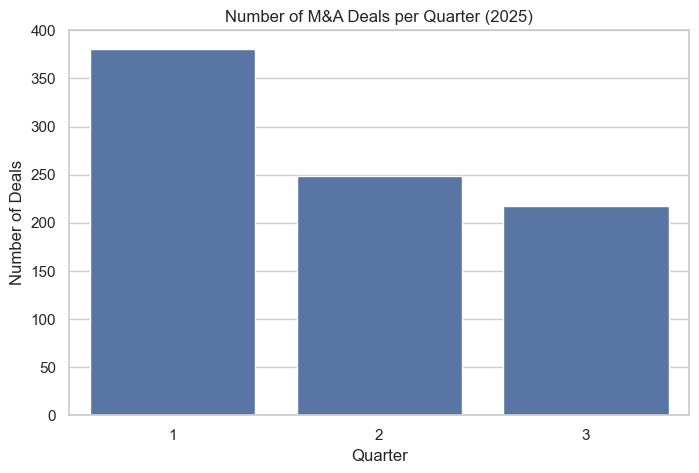

In [27]:
# Deals announced over time
deals_over_time = df.groupby('quarter')['deal_id'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='quarter', y='deal_id', data=deals_over_time)
plt.title("Number of M&A Deals per Quarter (2025)")
plt.xlabel("Quarter")
plt.ylabel("Number of Deals")
plt.show()

/var/folders/s7/vw1gc9s54f9f0nns5r4y4zhc0000gn/T/ipykernel_64317/3242475255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='industry', x='deal_count', data=top_industries, palette='Blues_r')


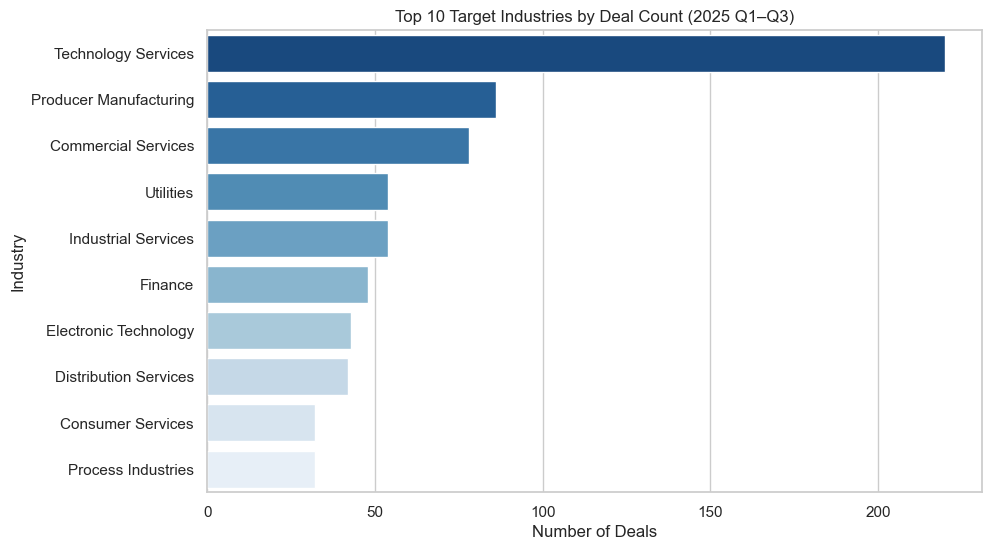

In [28]:
# Industry distribution of target companies
top_industries = df['sector_targetissuer'].value_counts().head(10).reset_index()
top_industries.columns = ['industry', 'deal_count']

plt.figure(figsize=(10, 6))
sns.barplot(y='industry', x='deal_count', data=top_industries, palette='Blues_r')
plt.title("Top 10 Target Industries by Deal Count (2025 Q1–Q3)")
plt.xlabel("Number of Deals")
plt.ylabel("Industry")
plt.show()

/var/folders/s7/vw1gc9s54f9f0nns5r4y4zhc0000gn/T/ipykernel_64317/604982668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='deal_type', y='count', data=deal_type_counts, palette='pastel')


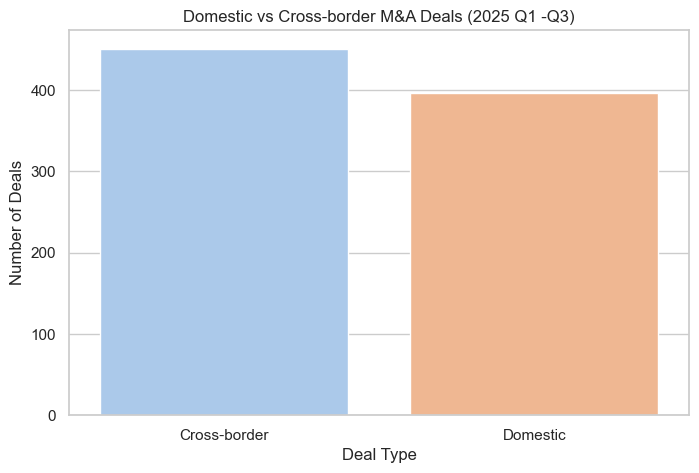

In [29]:
# Domestic and Cross-border deals
df['deal_type'] = np.where(df['country_buyerinvestor'] == df['country_targetissuer'], 'Domestic', 'Cross-border')
deal_type_counts = df['deal_type'].value_counts().reset_index()
deal_type_counts.columns = ['deal_type', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(x='deal_type', y='count', data=deal_type_counts, palette='pastel')
plt.title("Domestic vs Cross-border M&A Deals (2025 Q1 -Q3)")
plt.xlabel("Deal Type")
plt.ylabel("Number of Deals")
plt.show()

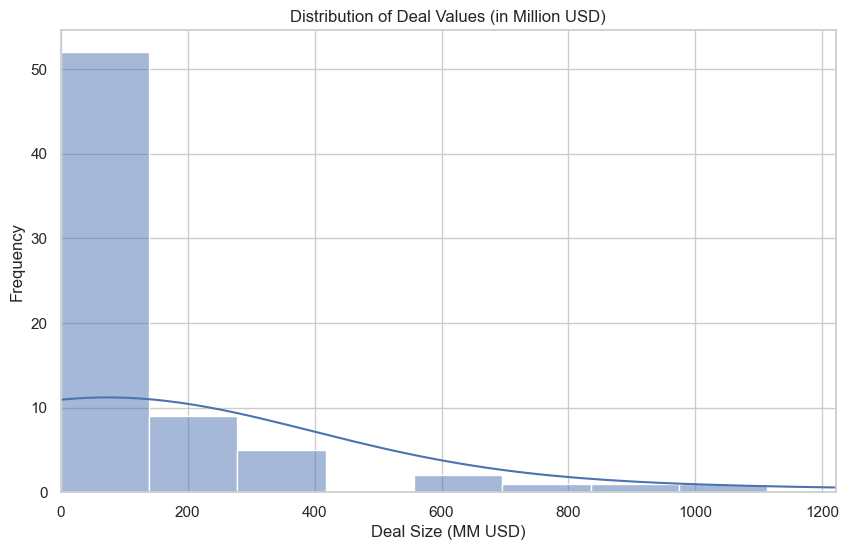

In [30]:
# Deal value distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df['deal_size_mm_usd'], bins=30, kde=True)
plt.title("Distribution of Deal Values (in Million USD)")
plt.xlabel("Deal Size (MM USD)")
plt.ylabel("Frequency")
plt.xlim(0, df['deal_size_mm_usd'].quantile(0.95))  # Focus on 95th percentile
plt.show()

/var/folders/s7/vw1gc9s54f9f0nns5r4y4zhc0000gn/T/ipykernel_64317/3701177087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='sector_targetissuer', x='deal_size_mm_usd', data=avg_deal_size_industry, palette='Greens_r')


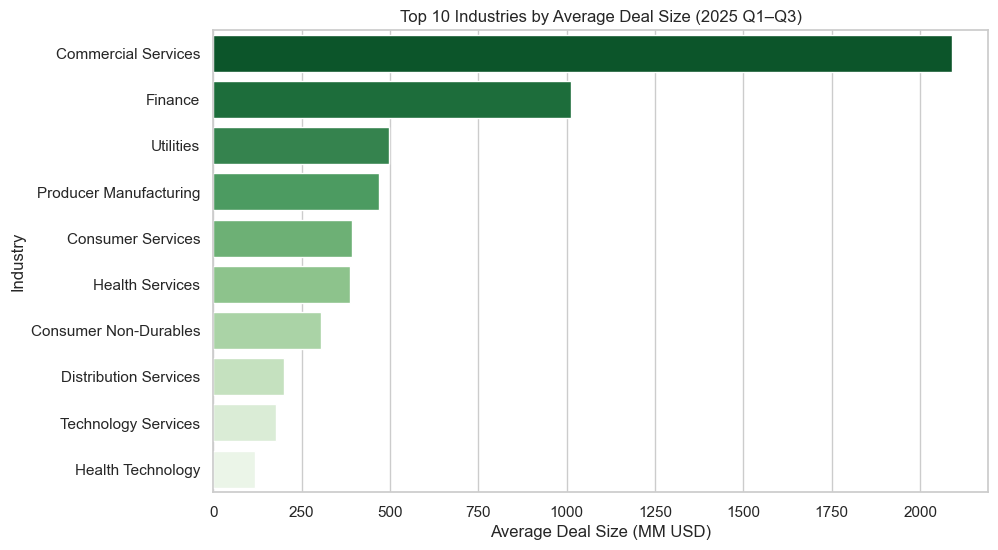

In [31]:
# average deal size by industry
avg_deal_size_industry = df.groupby('sector_targetissuer')['deal_size_mm_usd'].mean().reset_index().sort_values(by='deal_size_mm_usd', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y='sector_targetissuer', x='deal_size_mm_usd', data=avg_deal_size_industry, palette='Greens_r')
plt.title("Top 10 Industries by Average Deal Size (2025 Q1–Q3)")
plt.xlabel("Average Deal Size (MM USD)")
plt.ylabel("Industry")
plt.show()

/var/folders/s7/vw1gc9s54f9f0nns5r4y4zhc0000gn/T/ipykernel_64317/50877151.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


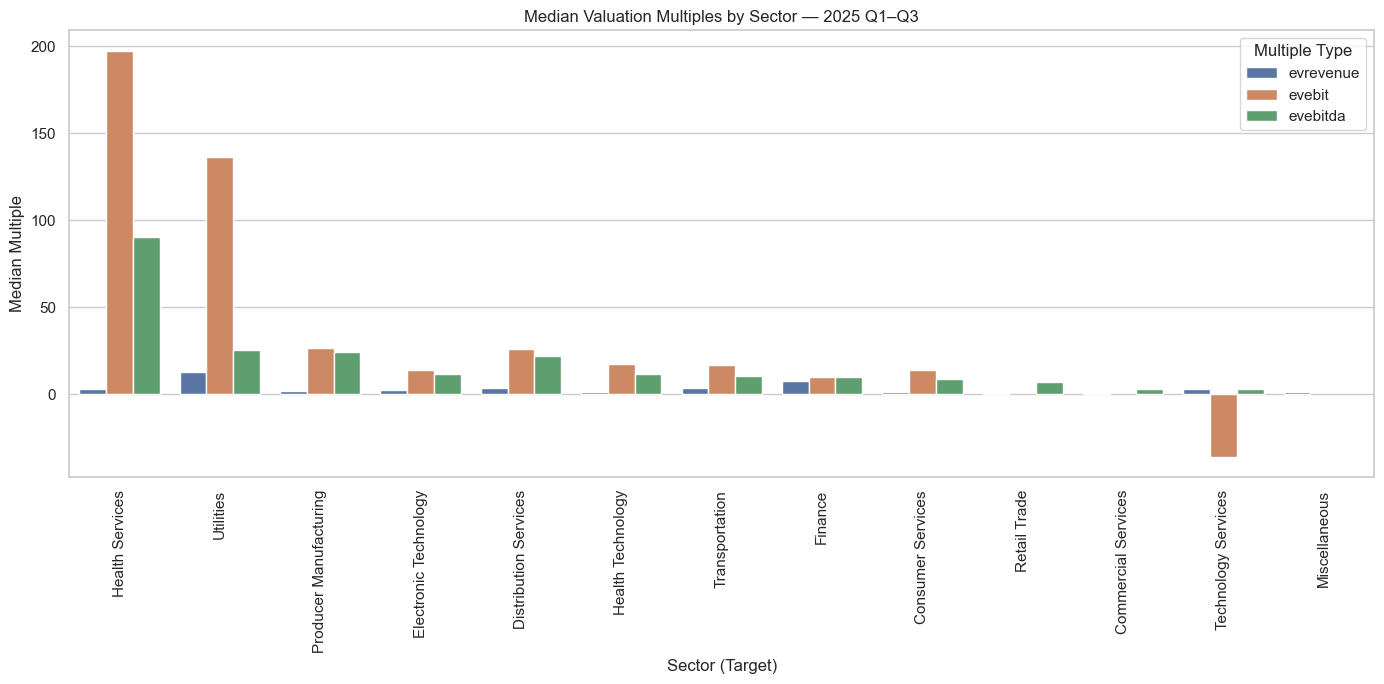

In [59]:
# Valuation multiples across industries

# remove negative and zero multiples
df = df[(df['evrevenue'] > 0) | (df['evebitda'] > 0) | (df['evebit'] > 0)]

# Select relevant columns
multiples = df[['sector_targetissuer', 'evrevenue', 'evebitda', 'evebit']].copy()

# Valuation multiples across industries

# remove negative and zero multiples
df = df[(df['evrevenue'] > 0) | (df['evebitda'] > 0) | (df['evebit'] > 0)]

# Select relevant columns
multiples = df[['sector_targetissuer', 'evrevenue', 'evebitda', 'evebit']].copy()

# Melt into long format
multiples_melted = multiples.melt(
    id_vars='sector_targetissuer',
    value_vars=['evrevenue', 'evebit', 'evebitda'],
    var_name='multiple_type',
    value_name='multiple_value'
)

# Compute sector order by mean EV/EBITDA (descending)
order = (
    multiples_melted[multiples_melted['multiple_type'] == 'evebitda']
    .groupby('sector_targetissuer')['multiple_value']
    .mean()
    .sort_values(ascending=False)
    .index.tolist()
)

# Plot — use estimator=np.mean and remove the CI if you want plain means
plt.figure(figsize=(14, 7))
sns.barplot(
    data=multiples_melted,
    x='sector_targetissuer',
    y='multiple_value',
    hue='multiple_type',
    order=order,
    estimator=np.median,
    ci=None  # set to None to hide error bars
)
plt.xticks(rotation=90)
plt.title("Median Valuation Multiples by Sector — 2025 Q1–Q3")
plt.ylabel("Median Multiple")
plt.xlabel("Sector (Target)")
plt.legend(title="Multiple Type")
plt.tight_layout()
plt.show()

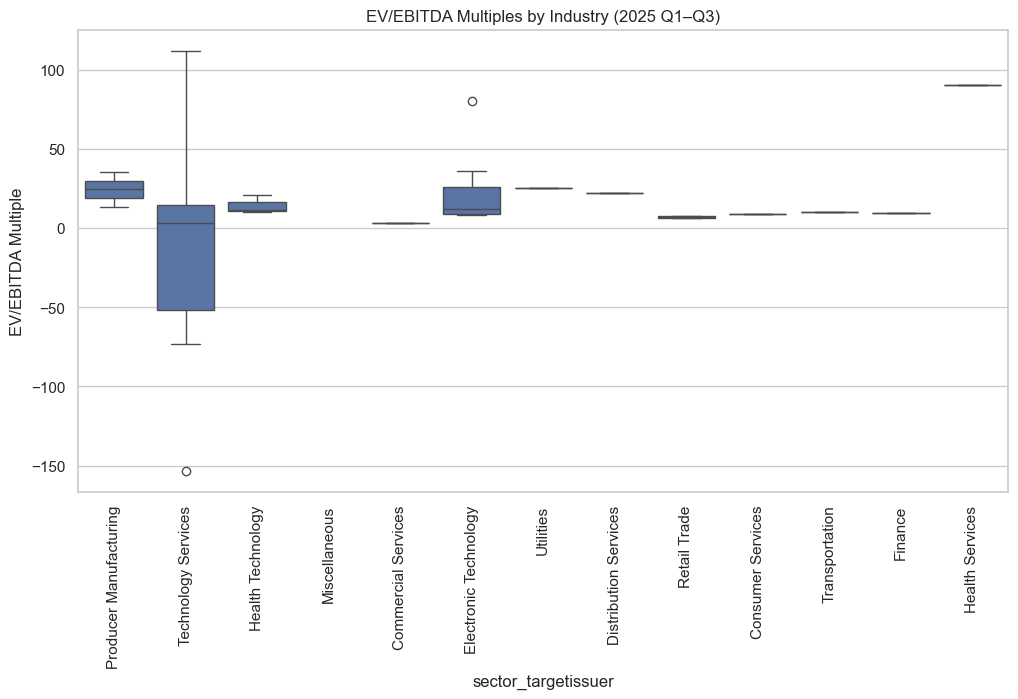

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector_targetissuer', y='evebitda', data=df)
plt.xticks(rotation=90)
plt.title("EV/EBITDA Multiples by Industry (2025 Q1–Q3)")
plt.ylabel("EV/EBITDA Multiple")
plt.show()

/var/folders/s7/vw1gc9s54f9f0nns5r4y4zhc0000gn/T/ipykernel_64317/1549575873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country', x='deal_count', data=top_buyer_countries, palette='Oranges_r')


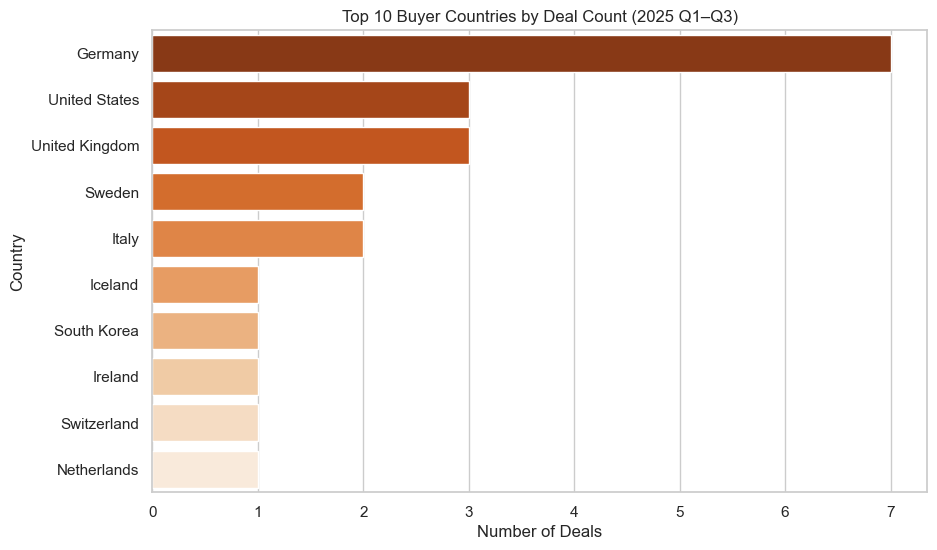

In [22]:
# Buyer country analysis - Top 10 buyer countries by deal count
top_buyer_countries = df['country_buyerinvestor'].value_counts().head(10).reset_index()
top_buyer_countries.columns = ['country', 'deal_count']
plt.figure(figsize=(10, 6))
sns.barplot(y='country', x='deal_count', data=top_buyer_countries, palette='Oranges_r')
plt.title("Top 10 Buyer Countries by Deal Count (2025 Q1–Q3)")
plt.xlabel("Number of Deals")
plt.ylabel("Country")
plt.show()

/var/folders/s7/vw1gc9s54f9f0nns5r4y4zhc0000gn/T/ipykernel_64317/4168566134.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country_buyerinvestor', x='deal_size_mm_usd', data=avg_deal_size_buyer_country, palette='Purples_r')


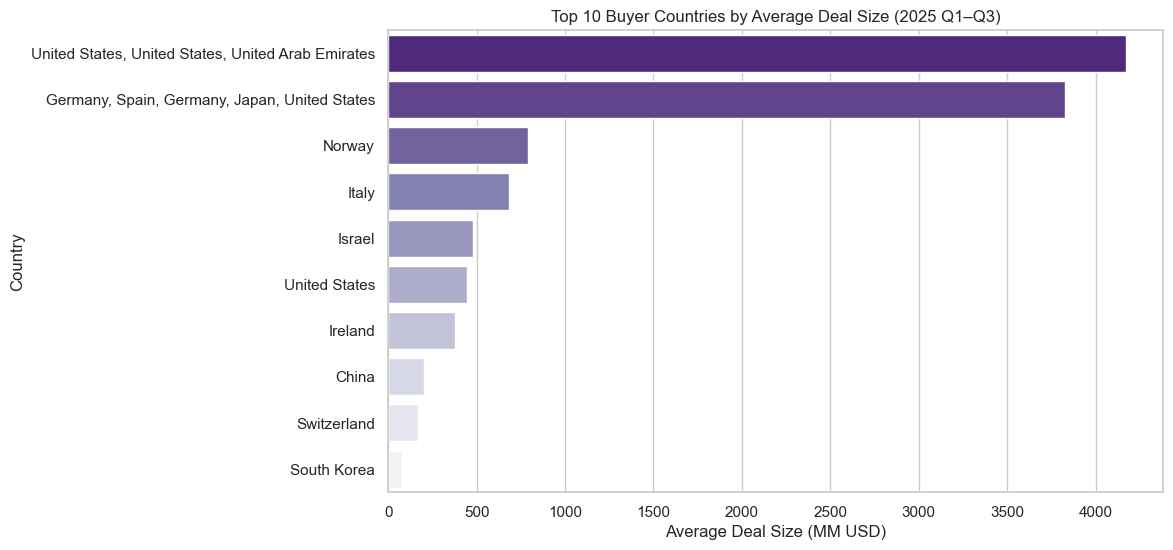

In [58]:
# Average deal size by country of buyer 
avg_deal_size_buyer_country = df.groupby('country_buyerinvestor')['deal_size_mm_usd'].mean().reset_index().sort_values(by='deal_size_mm_usd', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y='country_buyerinvestor', x='deal_size_mm_usd', data=avg_deal_size_buyer_country, palette='Purples_r')
plt.title("Top 10 Buyer Countries by Average Deal Size (2025 Q1–Q3)")
plt.xlabel("Average Deal Size (MM USD)")
plt.ylabel("Country")
plt.show()

### Key Insights

- M&A activity peaked in Q1 2025, driven mainly by technology and industrial sectors.  
- Cross-border deals represented over half of total transactions (53%), with the U.S. and Switzerland leading.  
- Median EV/EBITDA multiple was highest in the healthcare industry 
